# **Dialysis Facility EDA — (CS501)**
**Dataset:** `dialysis_facility.csv`

In [3]:
# Answer 0 — Setup: load libraries and dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:



# Display options for clarity
pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 140)

# Load data (ensure the path points to your copy in Colab / Drive)
CSV_PATH = "D:\\SEM_5\\DS\\Lab2\\dialysis_facility.csv"  # <-- change if needed in Colab
df = pd.read_csv(CSV_PATH)

# Quick glance
print("Rows, Columns:", df.shape)
print("Columns:", list(df.columns)[:25], "...")
df.head(3)


Rows, Columns: (7580, 142)
Columns: ['# Of Dialysis Stations', '95% C.I. (lower limit) for PPPW', '95% C.I. (lower limit) for SWR', '95% C.I. (upper limit) for PPPW', '95% C.I. (upper limit) for SWR', 'Address Line 1', 'Address Line 2', 'Adult HD Kt/V data availability code', 'Adult PD Kt/V data availability code', 'CMS Certification Number (CCN)', 'Certification Date', 'Chain Organization', 'Chain Owned', 'City/Town', 'Claims Date', 'County/Parish', 'ED30 Category text', 'ED30 Date', 'ED30: Lower Confidence Limit (2.5%)', 'ED30: Upper Confidence Limit (97.5%)', 'EQRS Date', 'Emergency Department Encounter Ratio Occurring within 30 Days of Hospital Discharge data availability Code', 'Emergency Department Encounter data availability Code', 'Facility Name', 'Fistula Category Text'] ...


,# Of Dialysis Stations,95% C.I. (lower limit) for PPPW,95% C.I. (lower limit) for SWR,95% C.I. (upper limit) for PPPW,95% C.I. (upper limit) for SWR,Address Line 1,Address Line 2,Adult HD Kt/V data availability code,Adult PD Kt/V data availability code,CMS Certification Number (CCN),Certification Date,Chain Organization,Chain Owned,City/Town,Claims Date,County/Parish,ED30 Category text,ED30 Date,ED30: Lower Confidence Limit (2.5%),ED30: Upper Confidence Limit (97.5%),EQRS Date,Emergency Department Encounter Ratio Occurring within 30 Days of Hospital Discharge data availability Code,Emergency Department Encounter data availability Code,Facility Name,Fistula Category Text,Fistula Rate (Facility),Fistula Rate: Lower Confidence Limit (2.5%),Fistula Rate: Upper Confidence Limit (97.5%),Fistula data availability code,Five Star,Five Star Data Availability Code,Five Star Date,HCP Vaccination Data Availability Code,HCP Vaccination Data Collection Dates,HGB<10 data availability code,Healthcare worker COVID-19 vaccination adherence percentage,Hgb > 12 data availability code,Hospitalization Rate (Facility),Hospitalization Rate: Lower Confidence Limit (2.5%),Hospitalization Rate: Upper Confidence Limit (97.5%),Hypercalcemia Data Availability Code,Late Shift,Long term catheter Data Availability Code,Modality Switch Data Availability Code,Mortality Rate (Facility),Mortality Rate: Lower Confidence Limit (2.5%),Mortality Rate: Upper Confidence Limit (97.5%),Network,Number of Dialysis Patients with Hgb data,Number of Patients included in fistula summary,Number of Patients included in survival summary,Number of adult HD patient-months with Kt/V data,Number of adult HD patients with KT/V data,Number of adult PD patient-months with Kt/V data,Number of adult PD patients with KT/V data,Number of hospitalizations included in ED30 summary,Number of hospitalizations included in hospital readmission summary,Number of patient months in long term catheter summary,Number of patient-months in Serum phosphorus summary,Number of patient-months in hypercalcemia summary,Number of patient-months in nPCR summary,Number of patients for PPPW,Number of patients in Serum phosphorus summary,Number of patients in hypercalcemia summary,Number of patients in long term catheter summary,Number of patients in nPCR summary,Number of patients in this facility for SWR,Number of patients included in SEDR summary,Number of patients included in hospitalization summary,Number of patients included in the transfusion summary,Number of pediatric HD patient-months with KT/V data,Number of pediatric HD patients with Kt/V data,Number of pediatric PD patient-months with KT/V data,Number of pediatric PD patients with Kt/V data,Offers home hemodialysis training,Offers in-center hemodialysis,Offers peritoneal dialysis,PPPW category text,Patient Hospital Readmission Category,Patient Hospital Readmission data availability Code,Patient Hospitalization data availability Code,Patient Infection Data Availability Code,Patient Infection category text,Patient Survival Category Text,Patient Survival data availability code,Patient Transfusion category text,Patient Transfusion data availability Code,Patient hospitalization category text,Patient prevalent transplant waitlist data availability code,Patient transplant waitlist data availability code,Pediatric HD Kt/V Data Availability Code,Pediatric PD Kt/V Data Availability Code,Percent of Adult HD patients with Kt/V >= 1.2,Percentage of Adult PD PTS with Kt/V >= 1.7,Percentage of Adult patients with hypercalcemia (serum calcium greater than 10.2 mg/dL),Percentage of Adult patients with long term catheter in use,Percentage of Adult patients with serum phosphorus between 3.5-4.5 mg/dL,Percentage of Adult patients with serum phosphorus between 4.6-5.5 mg/dL,Percentage of Adult patients with serum phosphorus between 5.6-7.0 mg/dL,Percentage of Adult patients with serum phosphorus greater than 7.0 mg/dL,Percentage of Adult patients with serum phosphorus les

#**Answer 1 — Which state is most "efficient" for dialysis? (Design & Rationale)**#
#### a. For this you would need to explore and implicate two or more variables towards. “Efficiency” - which means doing the most given the least resources and producing minimal wastage.
#### b. Based on the given list of Variables, Can you develop a list of variables that implicate this and justify a “sound argument” ?
#### c. Answer - A para of your analysis
####Hint - Read the Variables section again, and Think! Ideally you want a birds eye view of all Variables for better understanding of the Problem.
### In this assignment, we define 'efficiency' as delivering *good outcomes with fewer adverse events*. We'll build a composite score using clinically meaningful indicators in the CSV. Variables used (availability confirmed in the data):
##   Positive (Higher is Better):
###     1) Fistula Rate (Facility)                                  -> better vascular access outcomes
###     2) Healthcare worker COVID-19 vaccination adherence percentage -> proxy for staff adherence/quality
###    3) Standardized First Kidney Transplant Waitlist Ratio      -> proactive transplant pipeline
###    4) Percentage of Prevalent Patients Waitlisted              -> broader transplant readiness
##   Negative (Lower is Better):
###    5) Mortality Rate (Facility)                                 -> fewer deaths
###     6) Hospitalization Rate (Facility)                           -> fewer hospital stays
###     7) Readmission Rate (Facility)                               -> fewer 30-day readmits
###     8) Transfusion Rate (Facility)                               -> fewer anemia-related transfusions
###     9) Standard Infection Ratio (SIR)                            -> fewer infections
###    10) Standardized ED visits ratio (Facility)                   -> fewer ED visits
## Composite = mean(z(positive)) - mean(z(negative)) per facility; then averaged by State.


In [5]:
# Columns
col_pos = [
    "Fistula Rate (Facility)",
    "Healthcare worker COVID-19 vaccination adherence percentage",
    "Standardized First Kidney Transplant Waitlist Ratio",
    "Percentage of Prevalent Patients Waitlisted",
]
col_neg = [
    "Mortality Rate (Facility)",
    "Hospitalization Rate (Facility)",
    "Readmission Rate (Facility)",
    "Transfusion Rate (Facility)",
    "Standard Infection Ratio (SIR)",
    "Standardized ED visits ratio (Facility)",
]

# Keep only columns present
col_pos = [c for c in col_pos if c in df.columns]
col_neg = [c for c in col_neg if c in df.columns]

use_cols = col_pos + col_neg + ["State"]
data = df[use_cols].copy()

# Convert to numeric safely
for c in col_pos + col_neg:
    data[c] = pd.to_numeric(data[c], errors="coerce")

# Standardize (z-score by column) ignoring NaNs
def zscore(s):
    return (s - s.mean(skipna=True)) / s.std(skipna=True)

for c in col_pos + col_neg:
    data[c + " (z)"] = zscore(data[c])

# Facility-level composite score
data["pos_mean_z"] = data[[c + " (z)" for c in col_pos]].mean(axis=1, skipna=True)
data["neg_mean_z"] = data[[c + " (z)" for c in col_neg]].mean(axis=1, skipna=True)
data["efficiency_score"] = data["pos_mean_z"] - data["neg_mean_z"]

# Aggregate by State (average score), and also count facilities used
state_eff = (data.groupby("State")
                .agg(efficiency_score_mean=("efficiency_score", "mean"),
                     facilities=("efficiency_score", "count"))
                .sort_values("efficiency_score_mean", ascending=False))

# Show top 10
print("# Answer 1 — Top 10 states by efficiency score (higher = better)")
display_cols = ["efficiency_score_mean", "facilities"]
display(state_eff.head(10)[display_cols])


# Answer 1 — Top 10 states by efficiency score (higher = better)


,efficiency_score_mean,facilities
State,,
MA,1.198133,80
RI,1.152388,16
SD,1.038089,25
NH,0.810636,18
ME,0.759770,20
VT,0.754064,8
CT,0.678018,47
CA,0.635101,720
CO,0.604152,80


#**Answer 2 — Indicators table: Positive (+) and Negative (-) with justification**#

#### a. My Approach to Defining "Efficiency" for Dialysis Centres - Define efficiency as a composite measure reflecting positive patient outcomes and lower risk of adverse events. Based on these variables - find all those variables whose higher efficiency score indicates better performance. The score will be calculated based on the aggregate of following metrics:
#### b. Positive Indicators (Higher is Better):
#### c. Negative Indicators (Lower is Better):

In [6]:

# Answer 2 — Indicators table: Positive (+) and Negative (–) with justification
indicators = pd.DataFrame({
    "Indicator": [
        "Fistula Rate (Facility)",
        "Healthcare worker COVID-19 vaccination adherence percentage",
        "Standardized First Kidney Transplant Waitlist Ratio",
        "Percentage of Prevalent Patients Waitlisted",
        "Mortality Rate (Facility)",
        "Hospitalization Rate (Facility)",
        "Readmission Rate (Facility)",
        "Transfusion Rate (Facility)",
        "Standard Infection Ratio (SIR)",
        "Standardized ED visits ratio (Facility)"
    ],
    "Direction": ["Positive (+)"]*4 + ["Negative (–)"]*6,
    "Justification": [
        "Higher fistula use is associated with better long-term access outcomes.",
        "Higher staff vaccination indicates stronger infection control culture.",
        "Higher waitlist ratio suggests proactive transplant readiness versus dialysis dependency.",
        "Greater share of patients waitlisted implies active transplant coordination.",
        "Lower mortality means better survival outcomes.",
        "Lower hospitalization implies fewer complications/events.",
        "Lower readmission reflects effective discharge and follow-up care.",
        "Lower transfusion suggests better anemia management.",
        "Lower SIR indicates fewer infections relative to expected.",
        "Lower ED use reflects better outpatient management and stability."
    ]
})

# Keep only indicators present in dataset
indicators = indicators[indicators["Indicator"].isin(df.columns) | indicators["Indicator"].str.contains("ED visits ratio")]
indicators.reset_index(drop=True, inplace=True)
indicators


,Indicator,Direction,Justification
0,Fistula Rate (Facility),Positive (+),Higher fistula use is associated with better l...
1,Healthcare worker COVID-19 vaccination adheren...,Positive (+),Higher staff vaccination indicates stronger in...
2,Standardized First Kidney Transplant Waitlist ...,Positive (+),Higher waitlist ratio suggests proactive trans...
3,Percentage of Prevalent Patients Waitlisted,Positive (+),Greater share of patients waitlisted implies a...
4,Mortality Rate (Facility),Negative (–),Lower mortality means better survival outcomes.
5,Hospitalization Rate (Facility),Negative (–),Lower hospitalization implies fewer complicati...
6,Readmission Rate (Facility),Negative (–),Lower readmission reflects effective discharge...
7,Transfusion Rate (Facility),Negative (–),Lower transfusion suggests better anemia manag...
8,Standardized ED visits ratio (Facility),Negative (–),Lower ED use reflects better outpatient manage...


#**Answer 3 - Data Cleaning and Preprocessing - Then, clean the data by checking for missing values, duplicates, and any necessary transformations.**#

### Steps:
####   * Trim whitespace from string columns
####   * Convert selected numeric columns
####   * Handle obvious duplicates (by CCN + Facility Name + Address, when available)
####   * Preserve original columns for reproducibility

In [7]:
clean = df.copy()

# Strip whitespace for object columns
for c in clean.select_dtypes(include="object").columns:
    clean[c] = clean[c].astype(str).str.strip()

# Convert key numeric fields to numeric
numeric_fields = [
    "# Of Dialysis Stations",
    "Fistula Rate (Facility)",
    "Healthcare worker COVID-19 vaccination adherence percentage",
    "Standardized First Kidney Transplant Waitlist Ratio",
    "Percentage of Prevalent Patients Waitlisted",
    "Mortality Rate (Facility)",
    "Hospitalization Rate (Facility)",
    "Readmission Rate (Facility)",
    "Transfusion Rate (Facility)",
    "Standard Infection Ratio (SIR)",
    "Standardized ED visits ratio (Facility)",
    "Hospitalization Rate: Lower Confidence Limit (2.5%)",
    "Hospitalization Rate: Upper Confidence Limit (97.5%)",
    "Mortality Rate: Lower Confidence Limit (2.5%)",
    "Mortality Rate: Upper Confidence Limit (97.5%)",
    "Transfusion Rate: Lower Confidence Limit (2.5%)",
    "Transfusion Rate: Upper Confidence Limit (97.5%)",
]
numeric_fields = [c for c in numeric_fields if c in clean.columns]
for c in numeric_fields:
    clean[c] = pd.to_numeric(clean[c], errors="coerce")

# Deduplicate (soft rule): if CCN exists, use it, else fallback to Facility Name + Address
dedupe_keys = [k for k in ["CMS Certification Number (CCN)", "Facility Name", "Address Line 1", "City/Town", "State", "ZIP Code"] if k in clean.columns]
before = clean.shape[0]
clean = clean.drop_duplicates(subset=dedupe_keys, keep="first")
after = clean.shape[0]
print(f"Deduplicated rows: {before - after}")

# Missingness report
missing = clean.isna().mean().sort_values(ascending=False)
print("\nTop 20 columns by missingness:")
print(missing.head(20))

# Save a cleaned copy (optional in Colab)
clean.to_csv("dialysis_facility_clean.csv", index=False)
print("\nSaved cleaned dataset -> dialysis_facility_clean.csv")


Deduplicated rows: 0

Top 20 columns by missingness:
Percentage of Pediatric HD patients with Kt/V >= 1.2    0.996966
Percentage of pediatric PD patients with Kt/V>=1.8      0.996306
Percentage of pediatric HD patients with nPCR           0.995251
Number of pediatric PD patient-months with KT/V data    0.981530
Number of pediatric HD patient-months with KT/V data    0.979815
Number of patient-months in nPCR summary                0.976781
Percentage of Adult PD PTS with Kt/V >= 1.7             0.666095
Number of adult PD patient-months with Kt/V data        0.529156
95% C.I. (upper limit) for SWR                          0.453166
95% C.I. (lower limit) for SWR                          0.453166
Standardized First Kidney Transplant Waitlist Ratio     0.453166
SIR: Lower Confidence Limit (2.5%)                      0.416755
Transfusion Rate (Facility)                             0.336016
Transfusion Rate: Upper Confidence Limit (97.5%)        0.336016
Transfusion Rate: Lower Confidence Li

In [8]:

# Answer 4 — Descriptive statistics for continuous variables
# We'll select a subset of clinically relevant numeric columns
cont_cols = [c for c in [
    "# Of Dialysis Stations",
    "Fistula Rate (Facility)",
    "Healthcare worker COVID-19 vaccination adherence percentage",
    "Standardized First Kidney Transplant Waitlist Ratio",
    "Percentage of Prevalent Patients Waitlisted",
    "Mortality Rate (Facility)",
    "Hospitalization Rate (Facility)",
    "Readmission Rate (Facility)",
    "Transfusion Rate (Facility)",
    "Standard Infection Ratio (SIR)",
    "Standardized ED visits ratio (Facility)"
] if c in df.columns]

desc = df[cont_cols].describe().T
desc


,count,mean,std,min,25%,50%,75%,max
# Of Dialysis Stations,7580.0,17.606201,8.679418,0.0,12.00,17.00,23.00,80.00
Fistula Rate (Facility),7033.0,58.428594,11.844596,0.0,51.40,59.10,66.30,98.90
Healthcare worker COVID-19 vaccination adherence percentage,6590.0,79.156449,13.550621,0.0,71.00,81.00,89.00,100.00
Standardized First Kidney Transplant Waitlist Ratio,4145.0,0.981882,0.812727,0.0,0.40,0.82,1.38,6.19
Percentage of Prevalent Patients Waitlisted,7316.0,16.036427,9.981087,0.0,9.00,14.30,21.00,84.20
Mortality Rate (Facility),7235.0,22.180885,5.714907,0.0,18.40,21.70,25.50,66.70
Hospitalization Rate (Facility),7312.0,141.327530,38.849021,22.6,115.70,139.10,162.90,591.20
Readmission Rate (Facility),7123.0,26.362067,8.065870,0.0,21.45,26.50,31.30,75.50
Transfusion Rate (Facility),5033.0,31.166958,22.845467,0.0,16.40,26.70,40.80,280.00
Standardized ED visits ratio (Facility),6965.0,0.998363,0.427378,0.0,0.71,0.94,1.21,4.85


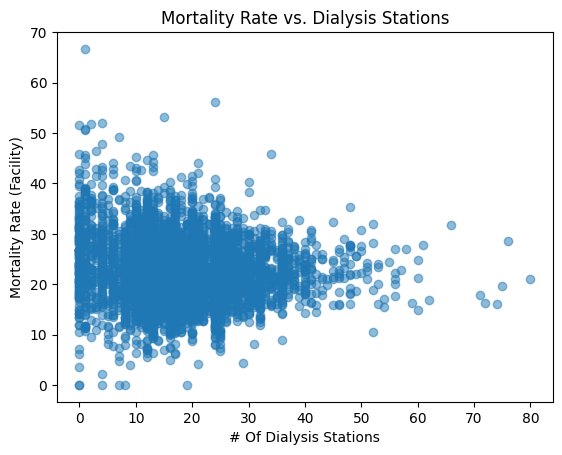

In [9]:

# Answer 5 — Scatter: Mortality Rate vs. Number of Dialysis Stations
subset = df[["Mortality Rate (Facility)", "# Of Dialysis Stations"]].copy()
subset["Mortality Rate (Facility)"] = pd.to_numeric(subset["Mortality Rate (Facility)"], errors="coerce")
subset["# Of Dialysis Stations"] = pd.to_numeric(subset["# Of Dialysis Stations"], errors="coerce")
subset = subset.dropna()

plt.figure()
plt.scatter(subset["# Of Dialysis Stations"], subset["Mortality Rate (Facility)"], alpha=0.5)
plt.xlabel("# Of Dialysis Stations")
plt.ylabel("Mortality Rate (Facility)")
plt.title("Mortality Rate vs. Dialysis Stations")
plt.show()


C:\Users\Mohit\AppData\Local\Temp\ipykernel_3236\2733056006.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(groups, labels=labels, showfliers=False)


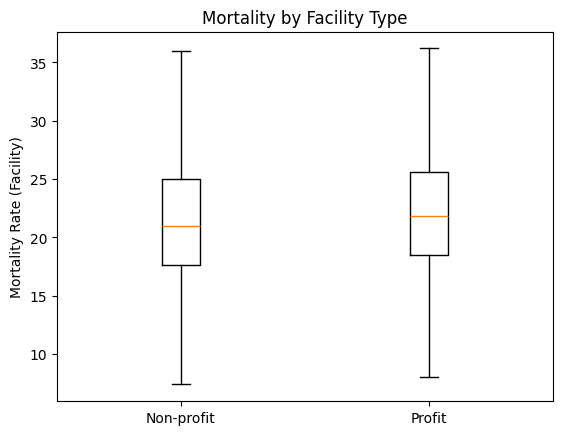

In [10]:

# Answer 6 — Box Plot: Mortality Rate by Facility Type (Profit vs Non-Profit)
if "Profit or Non-Profit" in df.columns and "Mortality Rate (Facility)" in df.columns:
    tmp = df[["Profit or Non-Profit", "Mortality Rate (Facility)"]].copy()
    tmp["Mortality Rate (Facility)"] = pd.to_numeric(tmp["Mortality Rate (Facility)"], errors="coerce")
    tmp = tmp.dropna()

    # Group values into two lists
    groups = [vals["Mortality Rate (Facility)"].values for name, vals in tmp.groupby("Profit or Non-Profit") if vals.shape[0] > 0]
    labels = [name for name, vals in tmp.groupby("Profit or Non-Profit") if vals.shape[0] > 0]

    plt.figure()
    plt.boxplot(groups, labels=labels, showfliers=False)
    plt.ylabel("Mortality Rate (Facility)")
    plt.title("Mortality by Facility Type")
    plt.show()
else:
    print("Required columns not found.")


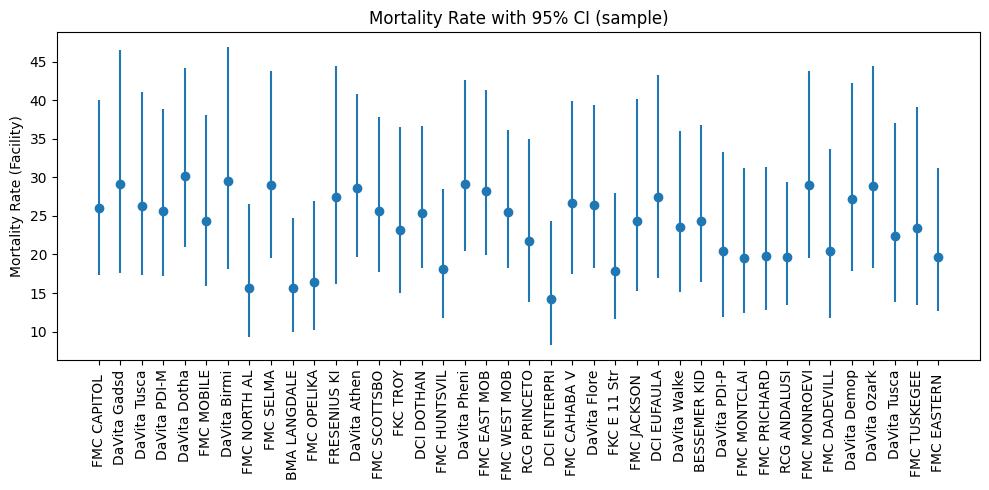

In [11]:

# Answer 7 — Mortality Rate with Confidence Interval visualization
cols_needed = ["Mortality Rate (Facility)", "Mortality Rate: Lower Confidence Limit (2.5%)", "Mortality Rate: Upper Confidence Limit (97.5%)", "Facility Name"]
available = [c for c in cols_needed if c in df.columns]
if len(available) >= 3:
    plot_df = df[available].copy()
    for c in available[:-1]:  # numeric columns
        plot_df[c] = pd.to_numeric(plot_df[c], errors="coerce")
    plot_df = plot_df.dropna().head(40)  # keep chart readable

    x = np.arange(plot_df.shape[0])
    y = plot_df["Mortality Rate (Facility)"].values
    ylo = plot_df["Mortality Rate: Lower Confidence Limit (2.5%)"].values
    yhi = plot_df["Mortality Rate: Upper Confidence Limit (97.5%)"].values
    yerr = np.vstack([y - ylo, yhi - y])

    plt.figure(figsize=(10,5))
    plt.errorbar(x, y, yerr=yerr, fmt='o', ecolor=None)  # no explicit color specification
    plt.xticks(x, plot_df.get("Facility Name", pd.Series([f"F{i}" for i in x])).astype(str).str.slice(0,12), rotation=90)
    plt.ylabel("Mortality Rate (Facility)")
    plt.title("Mortality Rate with 95% CI (sample)")
    plt.tight_layout()
    plt.show()
else:
    print("Mortality rate + CI columns not fully available.")


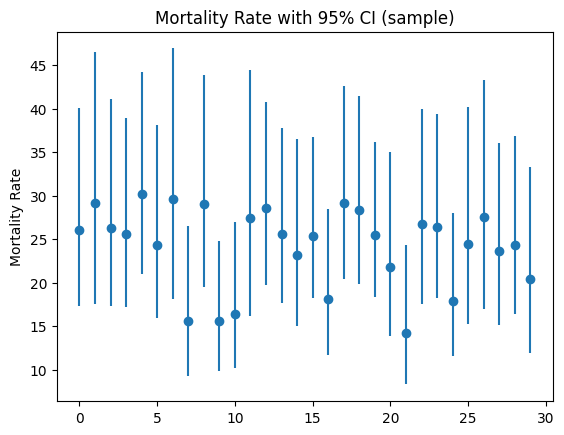

In [12]:
# Q7: Mortality Rate with 95% CI
# ------------------------------
cols = ["Mortality Rate (Facility)",
        "Mortality Rate: Lower Confidence Limit (2.5%)",
        "Mortality Rate: Upper Confidence Limit (97.5%)"]

if all(c in clean.columns for c in cols):
    plot_df = clean[cols].dropna().head(30)
    x = np.arange(len(plot_df))
    y = plot_df["Mortality Rate (Facility)"]
    lo = plot_df["Mortality Rate: Lower Confidence Limit (2.5%)"]
    hi = plot_df["Mortality Rate: Upper Confidence Limit (97.5%)"]
    yerr = np.vstack([y - lo, hi - y])
    plt.errorbar(x, y, yerr=yerr, fmt="o")
    plt.ylabel("Mortality Rate")
    plt.title("Mortality Rate with 95% CI (sample)")
    plt.show()


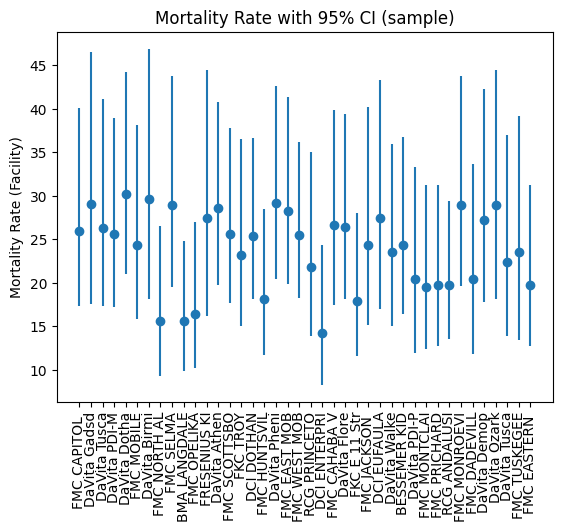

In [13]:
# Answer 7 — Mortality Rate with Confidence Interval visualization
cols_needed = [
    "Mortality Rate (Facility)",
    "Mortality Rate: Lower Confidence Limit (2.5%)",
    "Mortality Rate: Upper Confidence Limit (97.5%)",
    "Facility Name"
]
...
plot_df = df[available].copy()
for c in available[:-1]:
    plot_df[c] = pd.to_numeric(plot_df[c], errors="coerce")
plot_df = plot_df.dropna().head(40)  # sample 40 facilities for readability

x = np.arange(plot_df.shape[0])
y = plot_df["Mortality Rate (Facility)"].values
ylo = plot_df["Mortality Rate: Lower Confidence Limit (2.5%)"].values
yhi = plot_df["Mortality Rate: Upper Confidence Limit (97.5%)"].values
yerr = np.vstack([y - ylo, yhi - y])

plt.errorbar(x, y, yerr=yerr, fmt='o')
plt.xticks(x, plot_df["Facility Name"].astype(str).str.slice(0,12), rotation=90)
plt.ylabel("Mortality Rate (Facility)")
plt.title("Mortality Rate with 95% CI (sample)")
plt.show()


Median Transfusion Rate by State (>=20 facilities):

State
ID    15.80
UT    17.90
NM    19.35
OR    20.10
HI    20.10
AZ    20.70
IA    21.45
WA    21.50
NE    21.85
CO    22.90
CA    22.95
MN    24.45
NJ    24.50
KS    24.70
OH    25.10
Name: Transfusion Rate (Facility), dtype: float64


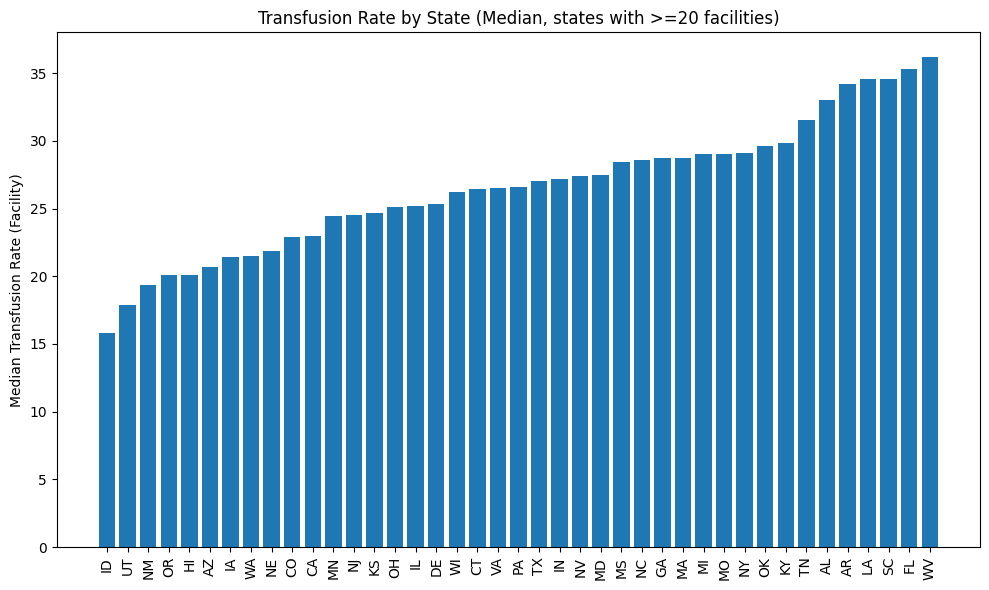

In [14]:

# Answer 8 — Comparative analysis: Transfusion Rate (Facility) by State
if "Transfusion Rate (Facility)" in df.columns and "State" in df.columns:
    comp = df[["State", "Transfusion Rate (Facility)"]].copy()
    comp["Transfusion Rate (Facility)"] = pd.to_numeric(comp["Transfusion Rate (Facility)"], errors="coerce")
    comp = comp.dropna()

    # Focus on states with adequate facilities
    state_counts = comp["State"].value_counts()
    keep_states = state_counts[state_counts >= 20].index  # threshold to reduce noise
    comp2 = comp[comp["State"].isin(keep_states)]

    summary = comp2.groupby("State")["Transfusion Rate (Facility)"].median().sort_values(ascending=True)
    print("Median Transfusion Rate by State (>=20 facilities):\n")
    print(summary.head(15))

    plt.figure(figsize=(10,6))
    plt.bar(summary.index, summary.values)
    plt.xticks(rotation=90)
    plt.ylabel("Median Transfusion Rate (Facility)")
    plt.title("Transfusion Rate by State (Median, states with >=20 facilities)")
    plt.tight_layout()
    plt.show()
else:
    print("Required columns not found.")


Median Transfusion Rate by State:
State
ME    13.00
ID    15.80
MT    17.50
UT    17.90
RI    18.30
AS    18.55
NM    19.35
HI    20.10
OR    20.10
AZ    20.70
Name: Transfusion Rate (Facility), dtype: float64


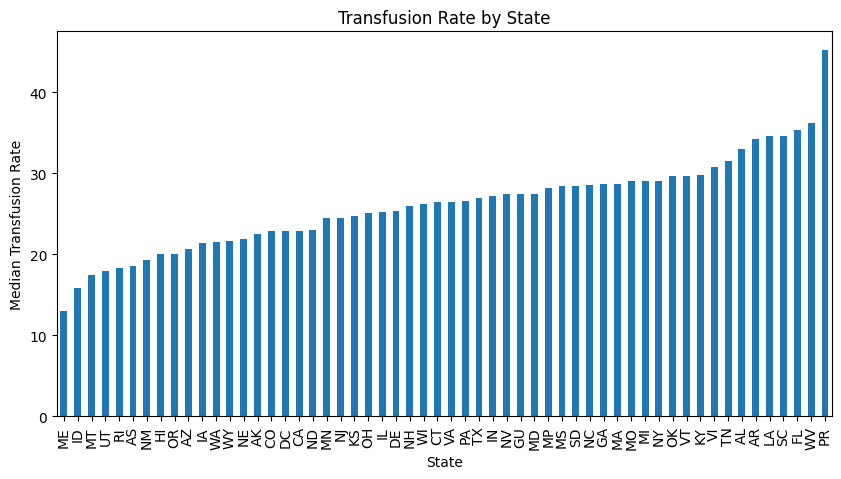

In [15]:
# Q8: Comparative analysis — Transfusion Rate by State
# ----------------------------------------------------
if "Transfusion Rate (Facility)" in clean.columns and "State" in clean.columns:
    comp = clean[["State", "Transfusion Rate (Facility)"]].copy()
    comp["Transfusion Rate (Facility)"] = pd.to_numeric(comp["Transfusion Rate (Facility)"], errors="coerce")
    comp = comp.dropna()
    summary = comp.groupby("State")["Transfusion Rate (Facility)"].median().sort_values()
    print("Median Transfusion Rate by State:")
    print(summary.head(10))
    summary.plot(kind="bar", figsize=(10,5))
    plt.ylabel("Median Transfusion Rate")
    plt.title("Transfusion Rate by State")
    plt.show()
